In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers.
Later, we will use the CNN model and compare the results with the ann model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train),(X_test,y_test)= datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train , y_test # They are 1D arrays

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

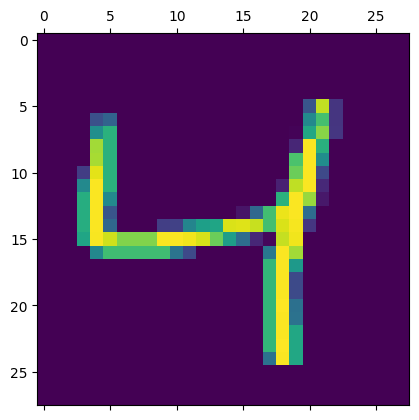

In [ ]:
plt.matshow(X_train[2])

In [ ]:
# Lets scale the inputs X_train and X_test
X_train = X_train/255
X_test = X_test/255

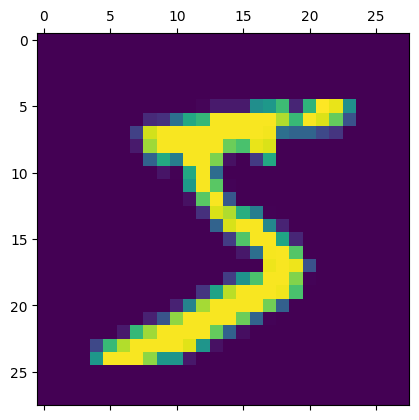

In [ ]:
plt.matshow(X_train[0])

In [ ]:
#Lets build an artificial neural network model with one hidden layer.
ann_digits = models.Sequential([
              layers.Flatten(input_shape=(28,28)),
              layers.Dense(700,activation='relu'),
              layers.Dense(10,activation='sigmoid')
])

ann_digits.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann_digits.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1919 - accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0756 - accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0491 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0169 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0135 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0126 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [ ]:
ann_digits.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9792


[0.09209715574979782, 0.979200005531311]

In [ ]:
y_pred = ann_digits.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_final = [np.argmax(element) for element in y_pred]
y_final[1]

2

In [ ]:
y_test[1]

2

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.94      0.98      0.96       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
cm = confusion_matrix(y_final,y_test)

Text(95.72222222222221, 0.5, 'Truth')

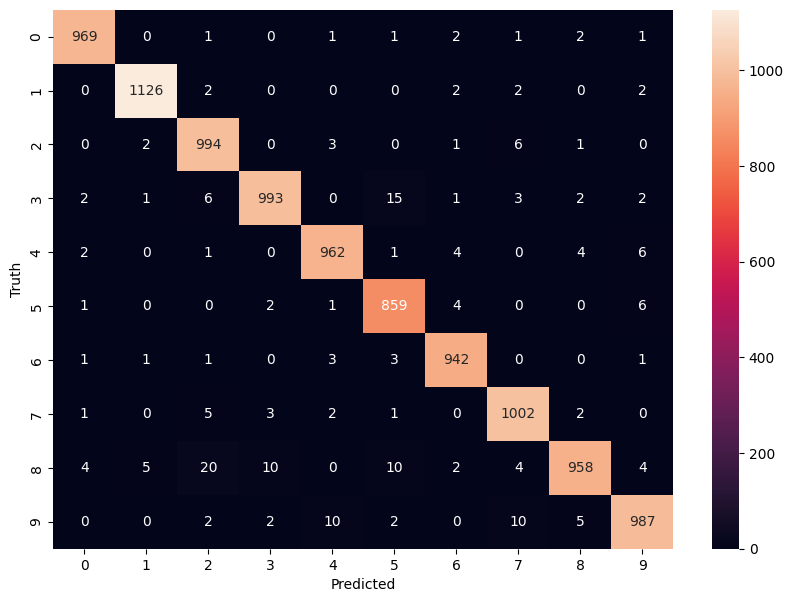

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

Now lets build a ConvNet or CNN model and compare the results with ANN model

In [ ]:
cnn_digits = models.Sequential([

              layers.Conv2D(filters=28, kernel_size=(4,4),activation='relu',input_shape=(28,28,1)),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(filters=56, kernel_size=(4,4), activation='relu'),
              layers.MaxPooling2D((2,2)),
              layers.Flatten(),
              layers.Dense(700,activation='relu'),
              layers.Dense(10,activation='softmax')
])

cnn_digits.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_digits.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1119 - accuracy: 0.9658
Epoch 2/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0393 - accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0261 - accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0198 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0152 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0130 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0068 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 73s 39m

In [ ]:
cnn_digits.evaluate(X_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.0420 - accuracy: 0.9914


[0.042031221091747284, 0.9914000034332275]

In [ ]:
out_pred = cnn_digits.predict(X_test)

313/313 [==============================] - 7s 21ms/step


In [ ]:
out_pred[0]

array([6.3155297e-19, 2.7354153e-14, 1.6320182e-17, 4.3334388e-16,
       1.6092059e-14, 8.8980091e-18, 6.6752058e-21, 9.9999994e-01,
       4.3937098e-17, 2.1080277e-14], dtype=float32)

In [ ]:
out_pred_val = [np.argmax(element) for element in out_pred]
out_pred_val[0:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,out_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
cm_cnn = confusion_matrix(out_pred_val,y_test)

Text(95.72222222222221, 0.5, 'Truth')

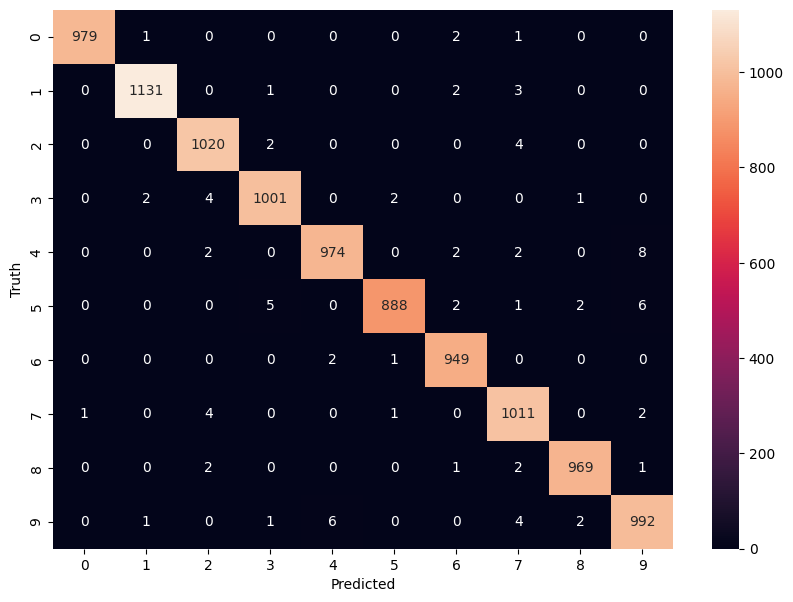

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_cnn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Hence, we can conclude that the accuracy improves with CNN model compared with ANN model.
Accuracy with ANN model : 0.98
Accuracy with CNN model : 0.99  and F1 scores have greatly improved.